In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from dataset import SignLanguageDataset, split_tensor_dataset, read_tensor_dataset
from utils import plot_dataset
from torch.utils.data import DataLoader
from torchvision.transforms import v2

# Load old annotated data

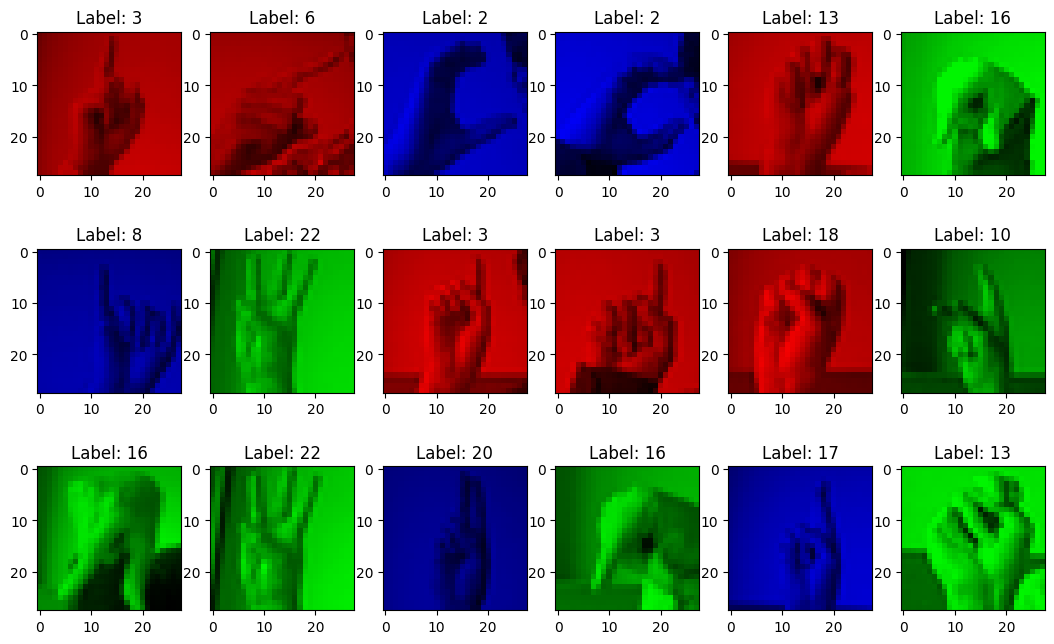

In [3]:
raw_data = read_tensor_dataset(
    "data/thws-mai-idl-ss-25-sign-language/SignLanguage_kaggle/old_annotated.pth")

plot_dataset(raw_data)

Train data lenght: 19218
Val data lenght: 4118
Test data lenght: 4119
torch.Size([1, 1, 128, 128])


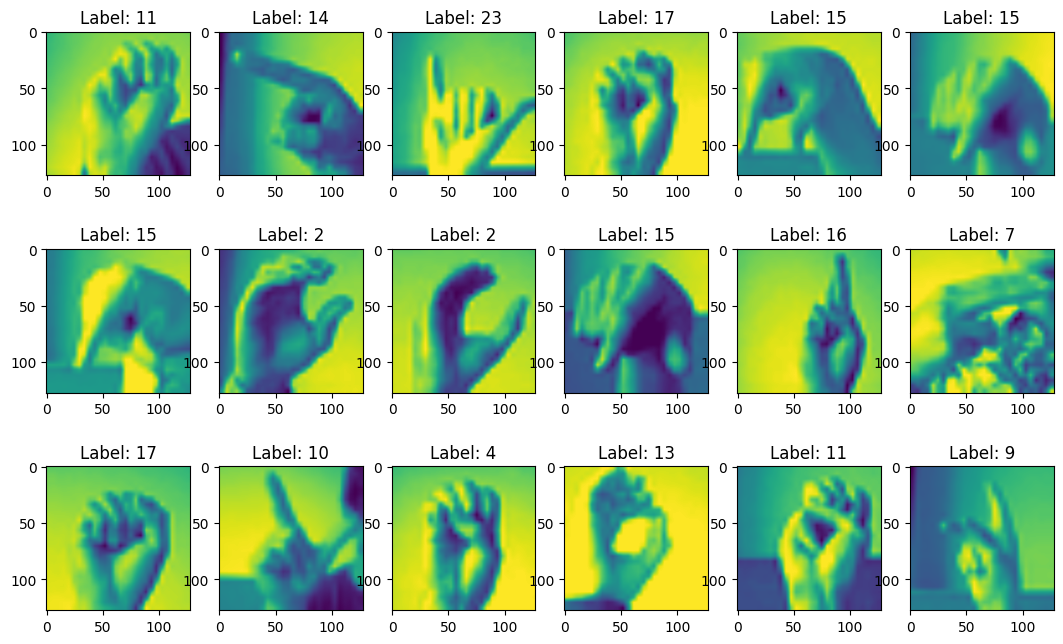

In [18]:
IMAGE_SIZE = 128
train_data, val_data, test_data = split_tensor_dataset(raw_data)

print(f"Train data lenght: {len(train_data)}")
print(f"Val data lenght: {len(val_data)}")
print(f"Test data lenght: {len(test_data)}")

transform = v2.Compose(
    [
        v2.ColorJitter(contrast=0.01),  # contrast 可设置为 float 或 (min, max) 元组
        v2.Resize(size=(IMAGE_SIZE, IMAGE_SIZE))
    ]
)

train_dataset = SignLanguageDataset(train_data, transform=transform)

train_dataloader = iter(DataLoader(
    train_dataset, batch_size=1, shuffle=True))
# print(next(train_dataloader))
img, label = next(train_dataloader)
print(img.shape)

plot_dataset(train_dataloader)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


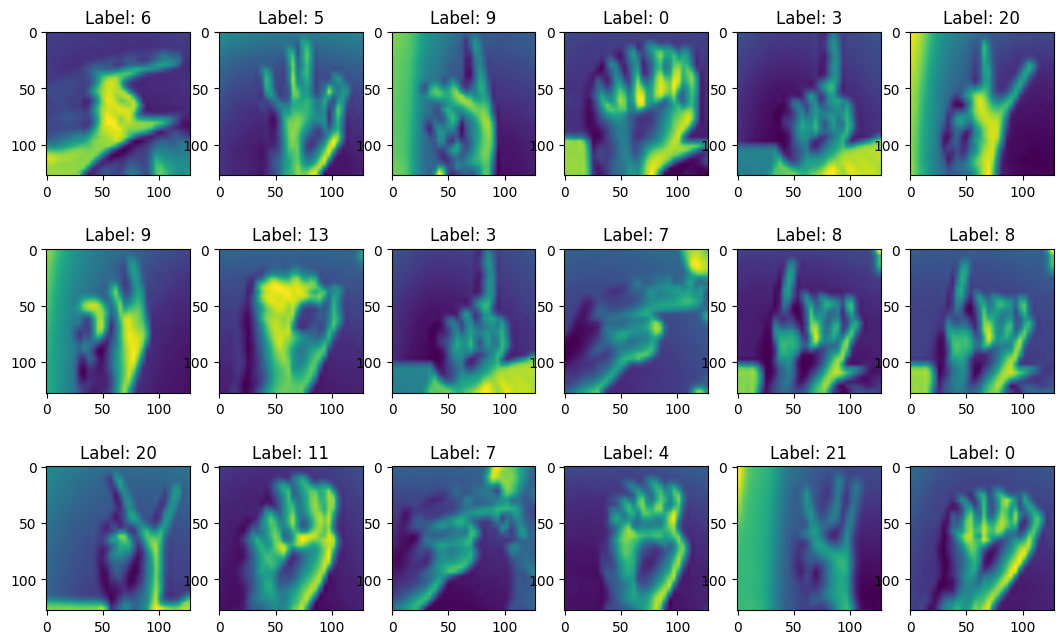

In [19]:
# Read todoexample, make sure the l"abels also didn't include 9
todo_example = read_tensor_dataset(
    "data/thws-mai-idl-ss-25-sign-language/SignLanguage_kaggle/todo_example.pth")

img, labels = todo_example[:]
sorted_labels = sorted(list(set(labels.tolist())))
print(sorted_labels)

tod_ex_dataset = SignLanguageDataset(
    todo_example, transform=transform)

todo_ex_dataloader = iter(DataLoader(tod_ex_dataset))

plot_dataset(todo_ex_dataloader)